In [1]:

# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
ride_data = pd.read_csv(ride_data_to_load)
city_data = pd.read_csv(city_data_to_load)


# Combine the data into a single dataset
merged_dataset = pd.merge(ride_data,city_data, how='left', on='city')
# Display the data table for preview
merged_dataset.head()

city                 date   fare        ride_id  \
0  Lake Jonathanshire  2018-01-14 10:14:22  13.83  5739410935873   
1  South Michelleport  2018-03-04 18:24:09  30.24  2343912425577   
2  Port Samanthamouth  2018-02-24 04:29:00  33.44  2005065760003   
3          Rodneyfort  2018-02-10 23:22:03  23.44  5149245426178   
4          South Jack  2018-03-06 04:28:35  34.58  3908451377344   

   driver_count   type  
0             5  Urban  
1            72  Urban  
2            57  Urban  
3            34  Urban  
4            46  Urban

## Bubble Plot of Ride Sharing Data

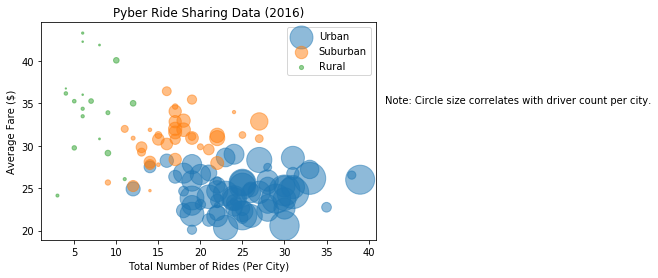

In [3]:
# Obtain the x and y coordinates for each of the three city types

#groupby city but filtered by specific TYPE 
rural = merged_dataset[merged_dataset['type']=='Rural'].groupby([merged_dataset['city']])
urban = merged_dataset[merged_dataset['type']=='Urban'].groupby([merged_dataset['city']])
suburban = merged_dataset[merged_dataset['type'] == 'Suburban'].groupby([merged_dataset['city']])

#rural variables X & Y 
rural_xtotal_rides_per_city = rural['ride_id'].count()
rural_yaverage_fare = rural['fare'].mean()
rural_drivercount_per_city = rural['driver_count'].sum()

#urban variables X & Y
urban_xtotal_rides_per_city = urban['ride_id'].count()
urban_yaverage_fare = urban['fare'].mean()
urban_drivercount_per_city = urban['driver_count'].sum()

#suburban variables X & Y
suburban_xtotal_rides_per_city = suburban['ride_id'].count()
suburban_yaverage_fare = suburban['fare'].mean()
suburban_drivercount_per_city = suburban['driver_count'].sum()

# Build the scatter plots for each city types
plt.scatter(urban_xtotal_rides_per_city,urban_yaverage_fare,alpha=0.50, s= urban_drivercount_per_city*0.45, label = "Urban")
plt.scatter(suburban_xtotal_rides_per_city,suburban_yaverage_fare,alpha=0.50, s=suburban_drivercount_per_city*0.45, label= "Suburban")
plt.scatter(rural_xtotal_rides_per_city,rural_yaverage_fare,alpha=0.50, s = rural_drivercount_per_city*0.45, label = "Rural")

plt.legend(loc="best")
plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
note = 'Note: Circle size correlates with driver count per city.'
plt.text(42,35, note, fontsize=10)

# Save Figure
plt.savefig("Images/pyber_starter1.png")

plt.show()



## Total Fares by City Type

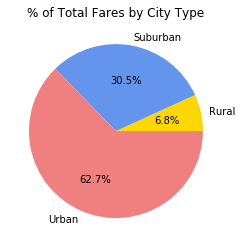

In [4]:
percent_per_type = merged_dataset.groupby(['type']).sum()['fare']


# Build Pie Chart
labels = 'Rural', 'Suburban', 'Urban'
colors = 'gold', 'cornflowerblue', 'lightcoral'

plt.pie(percent_per_type,labels=labels, autopct='%1.1f%%', colors = colors)
plt.title('% of Total Fares by City Type')

# Save Figure
plt.savefig("Images/pyber_starter2.png")

plt.show()

## Total Rides by City Type

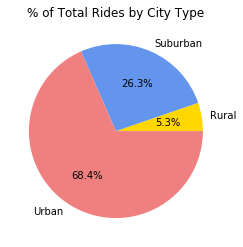

In [5]:
# Calculate Ride Percents
total_rides_groupby = merged_dataset.groupby(['type']).count()["ride_id"]
# Build Pie Chart
plt.pie(total_rides_groupby,labels=labels, autopct='%1.1f%%', colors = colors)
plt.title('% of Total Rides by City Type')
# Save Figure
plt.savefig("Images/pyber_starter3.png")



plt.show()


## Total Drivers by City Type

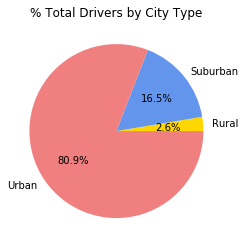

In [6]:
# Calculate Driver Percents

total_drivers_groupby = city_data.groupby(['type']).sum()["driver_count"]

# Build Pie Chart 

plt.pie(total_drivers_groupby,labels=labels, autopct='%1.1f%%', colors = colors)
plt.title('% Total Drivers by City Type')

# Save Figure
plt.savefig("Images/pyber_starter4.png")

plt.show()
